In [1]:
import numpy as np
import opinion_class as op

## Initialization

In [2]:
Y0 = np.array([0.0,3,3.5,4.0,12.0,13.0,14.0])

my_op = op.opinion(Y0)

# zero order problem
my_op.kh = 0.0 # no interactions
my_op.mu = 1.0 # minimize u**2
my_op.sat = np.infty # no saturation
my_op.eta = 0.5 # final neighborhood

# changing root solver
my_op.rootmethod = 'lm'

#my_op.atol = 1e-14
#my_op.rtol = 1e-10

# educated guess from 2 agents case
P0 = np.zeros((my_op.N,))
P0[0] = -0.491088
P0[-1] = 1.91331
tf0 = np.array([16.67589717602594845])


## Plotting educated guess

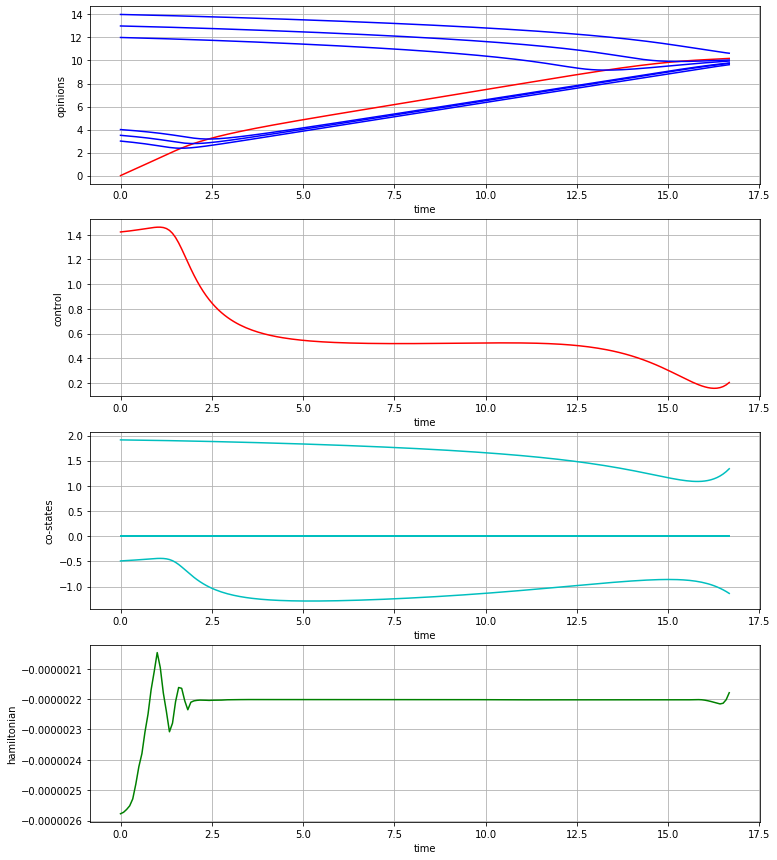

In [3]:
my_op.trace(P0,tf0)

## Solving zero order problem

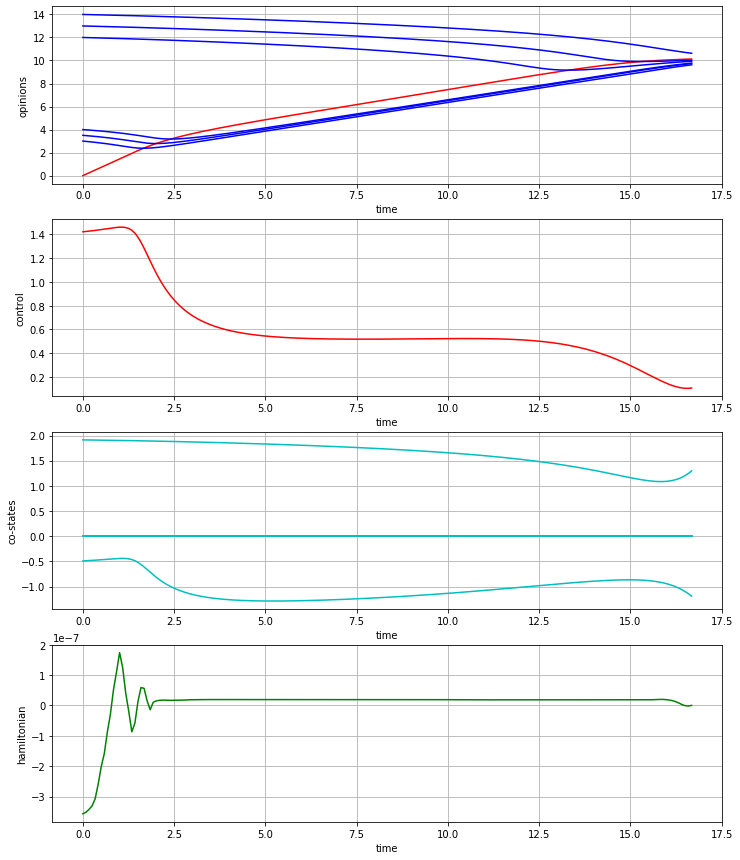

In [4]:
sol0, P1, tf1 = my_op.solve(P0,tf0,trace=True,echo=False)

## Continuation on interactions

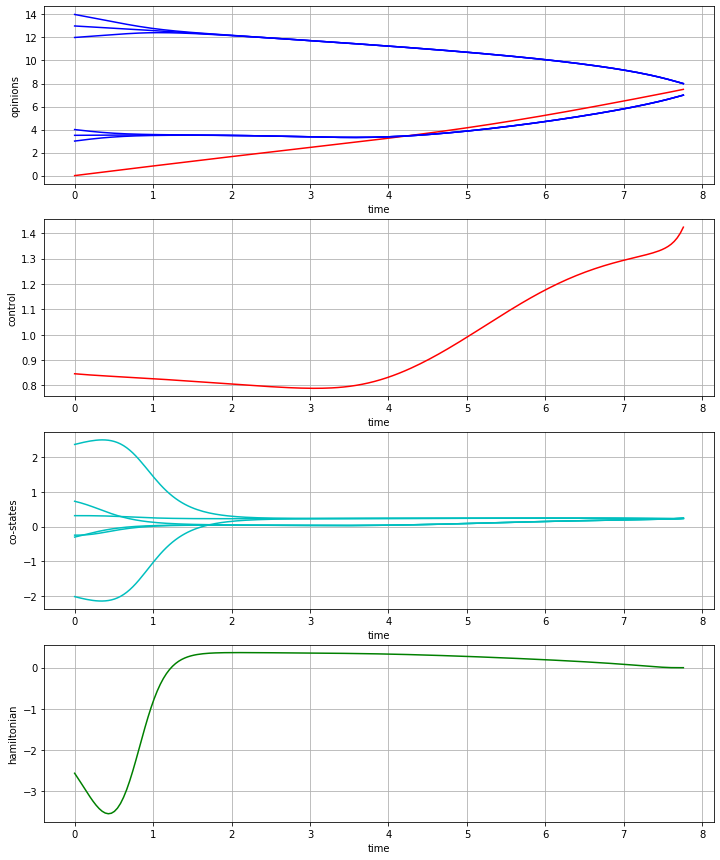

In [5]:
P2 = P1.copy()
P2[1:-1] = 0.01
tf2 = tf1.copy()

my_op.mu = 1.0
my_op.kh = 0.0
my_op.sat = np.infty

my_op.rootmethod = 'lm'

# continuation parameters
kh_end = 1.0
kh_step = 0.1

while my_op.kh < kh_end:
    
    my_op.kh += kh_step
    if my_op.kh > kh_end:
        my_op.kh = kh_end
#     print(my_op.kh)
    
    sol1, P2, tf2 = my_op.solve(P2,tf2,trace=False,echo=False)
#     print(sol1.success)

my_op.trace(P2,tf2)

## Fast continuation on control

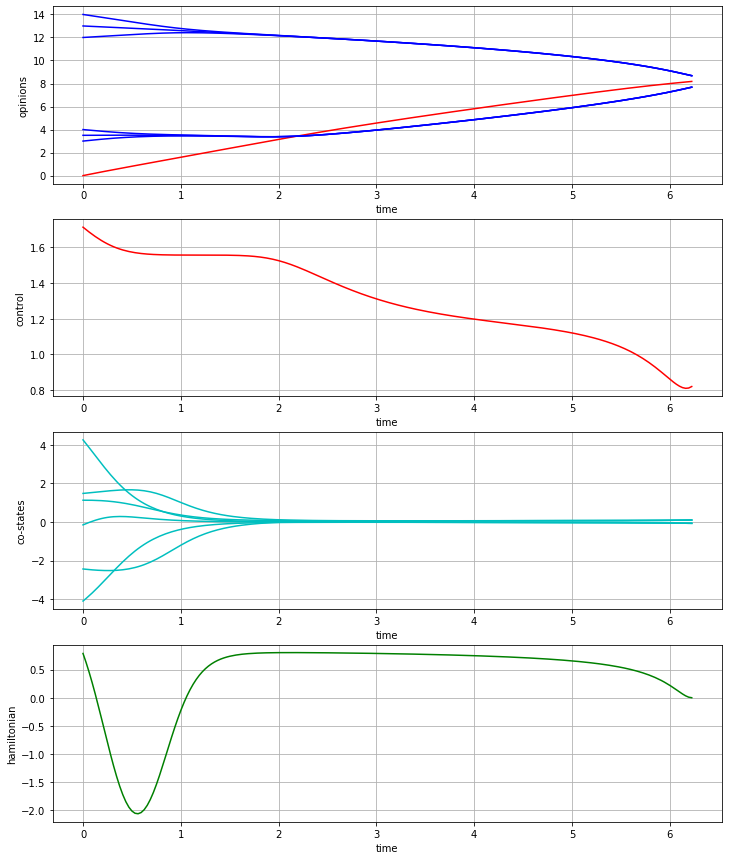

In [6]:
P3 = P2.copy()
tf3 = tf2.copy()

my_op.rootmethod = 'lm'

my_op.sat = 2.0 # introducing control saturation
my_op.mu = 1.0
my_op.kh = 1.0

# continuation parameters
mu_end = 0.1
mu_step = 0.1

while my_op.mu > mu_end:
    
    my_op.mu -= mu_step
    if my_op.mu < mu_end:
        my_op.mu = mu_end    
#     print(my_op.mu)
    
    sol2, P3, tf3 = my_op.solve(P3,tf3,trace=False,echo=False)
#     print(sol2.success)

my_op.trace(P3,tf3)

## Slow continuation on control cost

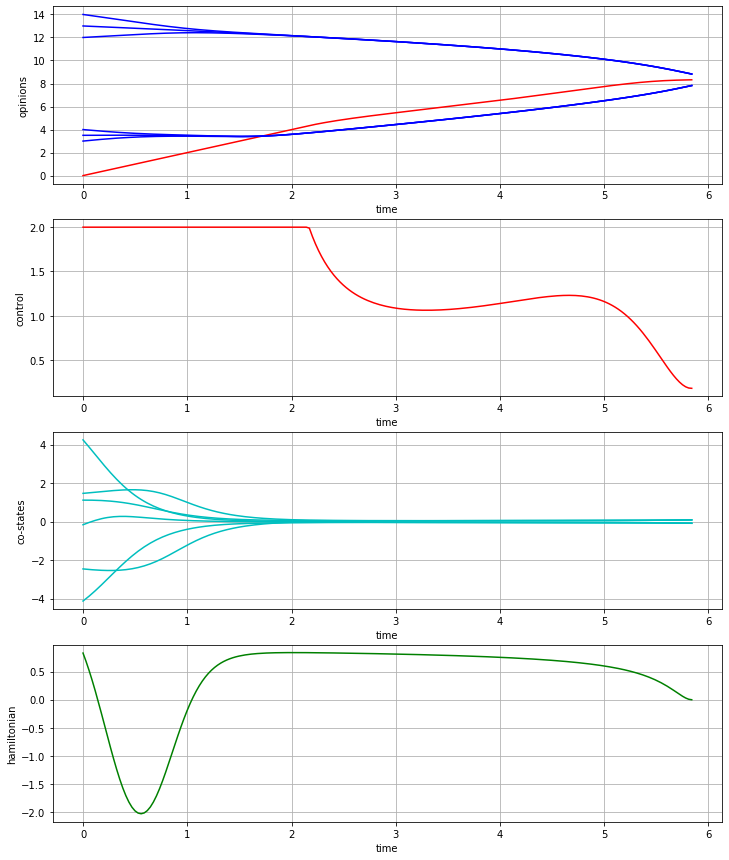

In [7]:
P4 = P3.copy()
tf4 = tf3.copy()

# continuation parameters
mu_end = 0.01
mu_step = 0.01

while my_op.mu > mu_end:
    
    my_op.mu -= mu_step
    if my_op.mu < mu_end:
        my_op.mu = mu_end    
#     print(my_op.mu)
    
    sol3, P4, tf4 = my_op.solve(P4,tf4,trace=False,echo=False)
#     print(sol2.success)

my_op.trace(P4,tf4)